# Hyperparameter Tuning Project
   ## Hyperparameter Tuning
 In machine learning different variables are used to design model. The performance of model deeply depends upon the value of these variables.
 These variables are called parameters of model.There are two types of parameters in machine learning.
   - Parameters
   - Hyperparameters
        ### Parameters :-
     These are those variables whose values are derived from the data on which model is being designed.values of these variables depend upon the data on which model is being designed.
     for example if we are designing a simple linear regression model, we know that it is a model of a straight line and the equation for straight line is
     y = mx + c
     where m is slop of line and c is y-intercept. The value of these two variables depends upon the values of x and y and x and y are input and output of the model and there values are given on which we design our model. So values of m and c will be derived from the given data on which model is being designed. These are parameters of the model
     ### Hyperparameters :-
     These are those variables of model whose values do not depened upon the dat on which model is being designed. values of these variables can not be derived from the given dataset.Rather values of these variables are set by the designer of the model, there is no exact rule for setting values of these variables.
     for example in KNN model. there is a variable k which is the number of nearest neighbors on which prediction is made. there is no rule how to set value of k. its value is different foe every dataset and can not be derived from dataset.
     Value of these parameters is set by using brute force technique( try different values for each parameter one by one and use the best one)
     these variables are called Hyperparameters of model
         In this project we build a model and then set different Hyperparameters of that model and see the effect of these parameter values.

### Problem
   
    in this project we classify emails as either email is 'spam' or 'not spam'.
    As our result will belong to some class so this problem belongs to 'Classification'.
    We have only two classes 'spam' and 'not spam', so this is binary classification problem.
    We use Logistic regression for binary classification so we apply Logistic Regression model to solve problem.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, roc_curve, auc

np.random.seed(42)


## Import Data

In [2]:
url="emails.csv.zip"
df=pd.read_csv(url)
print(df.shape)
print(df)


(5172, 3002)
       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  

### Spam vs Not spam
    Now we show how many emails in our datta are spam and how many are not spam using bar chart and pie chart.

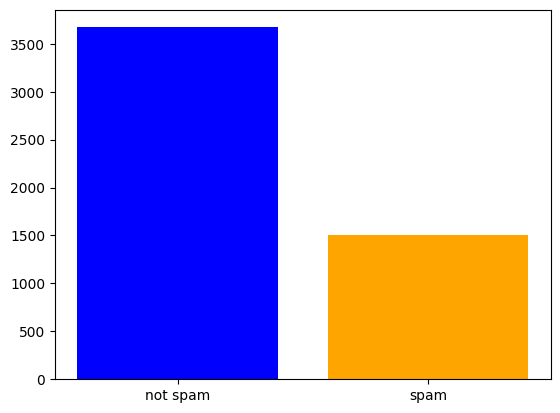

In [3]:
y_axis=df['Prediction'].value_counts()
x_axis=['not spam','spam']

#bar chart

plt.bar(x_axis,y_axis,color=['blue','orange'])
plt.show()




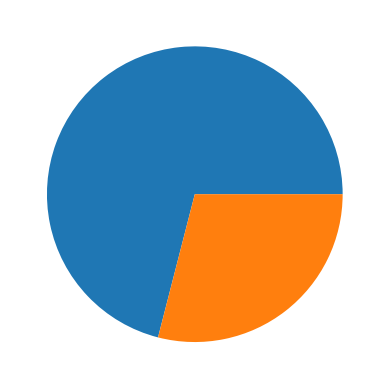

In [4]:
# pie chart

plt.pie(y_axis)
plt.show()

### Data understanding
    from above data it is clear that we have data of 5172 emails in our data file.Which are rows of our data file.
    Our file has 3002 No of columns.From which first column is 'Email No' and we have no interest in this column.
    The last column is 'Prediction' that is our output(Label) of our model.
    Remaining 3000 columns have data of emails each column represents a word(heading of column) and number in this column represents
    how much time this word repeted in that particular email.so these 3000 columns contain inputs(features) of our model.
    From above discussion it is clear that we have one output(Label) column and 3000 inputs(Features) columns.
    Now we extract our input columns from data and put in new variable 'X'.
    and we save our output data in variable 'Y'

### Setting input and output data

In [5]:
X = df.drop(columns=['Email No.' , 'Prediction'])
Y=df['Prediction']
print(X.shape)
print(Y.shape)


(5172, 3000)
(5172,)


### Splitting data
    Now we split our data into training data set and test data set.
    we break our data set so that 70% of data will be used as training the model and remaining 30% will be used to evaluate the model performance. 
    we use 'x_train' and 'y_train' variable names to store input and output training data respectively.
    we use 'x_test' and 'y_test' variable name to store input and output test data respectively.

In [6]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(" x_train = ", x_train.shape, "\n", "y_train = ", y_train.shape,"\n", "x_test = ", x_test.shape,"\n", "y_test = ",y_test.shape)

 x_train =  (3620, 3000) 
 y_train =  (3620,) 
 x_test =  (1552, 3000) 
 y_test =  (1552,)


### Model designing
    Now we design logistic Regression model on our training data

In [7]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [8]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )


In [9]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc
}

In [10]:
# define a function to train a model and return accuracy
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [11]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, x_train, y_train, x_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.7068298969072165
Precision:  0.0

For:  KNN
Accuracy:  0.8608247422680413
Precision:  0.7311411992263056

For:  NB
Accuracy:  0.9484536082474226
Precision:  0.8818737270875764

For:  DT
Accuracy:  0.8505154639175257
Precision:  0.9239543726235742

For:  LR
Accuracy:  0.9664948453608248
Precision:  0.9314775160599572

For:  RF
Accuracy:  0.9742268041237113
Precision:  0.9560439560439561


## HYPERPARAMETER TUNING
    Now we start tuning hyperparameters of models.
### Tuning K for Knn
    First we start withh KNN model.in KNN k is the number of neighbor of variables on which parameter classify the result.Now we use different values of k and for each value we design same model and calculate models efficiency and then compare results to show effect of k on model's performance.
    We store different values for k in an array called n_neighbors and loop through it and for each iteration run KNN model and checks it performance.

In [12]:

accuracy_scores = []
precision_scores = []
n_neighbors = [2,3,4,5]   # store values for k in array
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    y_predict=knn.predict(x_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_predict))
    precision_scores.append(precision_score(y_test, y_predict))

In [21]:
for i in range(4):
    print(f"for k = {n_neighbors[i]} , Accuracy = {accuracy_scores[i]} , Precision = {precision_scores[i]}")
#print(test_score)
#print("Accuracy " , accuracy_scores)
#print( "Precision " , precision_scores)

for k = 2 , Accuracy = 0.865979381443299 , Precision = 0.8158567774936062
for k = 3 , Accuracy = 0.8621134020618557 , Precision = 0.7395626242544732
for k = 4 , Accuracy = 0.8692010309278351 , Precision = 0.8014354066985646
for k = 5 , Accuracy = 0.8608247422680413 , Precision = 0.7311411992263056


    From above results it is clear that for k =2 we get best results.
    This shows how value of k affect the model's performance and as we have to adjust value of k manually so this is hyperparameter of KNN model.

 In above example we only tune model for one parameter but in general there are more than one parameters to be tuned.
 for that we set different values for each variable and then tune model for each combination of these parameters values and compare 
 results of each possible combination and then take the combination which gives best result.
 As number of parameters increased its become complex to loop through each combination, as for each variable make one loop and nest all loops.
 instead we use two search techniques to iterate through parameter possible values
  - Grid Sarch
  - Random Search
    

  ### Grid Search
    GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.
    We pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take.

In [22]:
from sklearn.model_selection import GridSearchCV
# Hyperparameters for logistic regression
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [23]:
import time

In [25]:

lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.961603 using {'dual': False, 'max_iter': 140}
Execution time: 26.509246826171875 ms


 ### Gridsearch Results
 In above code we use logisticregression with two Hyperparameters
  dual and max_iter
 we provide two possible values(true, false) for dual parameter and five[100,110,120,130,140] values for max_iter parameter.
 we use gridsearch to find best combination of these two parameters from givem possible values and give search provide best possible combination
 for given values, that is dual = 'False' and max_iter = '140'. and gridsearch took almost '26' ms to calculate possible given combination.
 If we increase number of parameters or possible values of each parameter value then number of possible combination will increase that will need
 more computational power and also took more time.
 
 

 ### Random Search
     Although grid search gives best possible combination of parameters but it also took more computation and more time to complete task.
     As number of parameters increases or possible values of parameter increases grid search becomes very expensive( computational power and time).
     There is another search methon inplace of Grid search and that is Random search that takes less computation hence decrease time to calculations.
     As name shows it took random values from possible values of parameters and perform operation to find optimal combination.
     Now we apply Random search for same configuration of parameters and see the results.

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.961603 using {'max_iter': 140, 'dual': False}
Execution time: 22.411121129989624 ms


 ### Randomsearch Results
     From above results it is clear that random search gives same result( Parameter configuration) as Gridsearch but it took less time '22' ms.
     The time difference in both searches seem very small it is due to that we have given only to parameters with small number of possible values .
     If we increase number of parameters or possible values of each parameter or botth then time taken by each search will be very different.

In [33]:
C = [1.0,1.5,2.0,2.5]
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)


In [34]:
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.962431 using {'C': 1.5, 'dual': False, 'max_iter': 110}
Execution time: 77.0304958820343 ms


    Now we increase only one parameter and that is 'C'. From result it is clear that by setting this parameter value our 
    model's result got better slightely. So it is clear that by tuning Hyperparameters of model model's performance got better.
    But it also increases computational time as only increasing one parameter with possible four values gridsearch took 
    almost three times more time( from 26 ms to 77 ms).

In [35]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.961326 using {'max_iter': 120, 'dual': False, 'C': 1.5}
Execution time: 26.66182804107666 ms


    Now we use same three parameter configuration and find optimal combination using random search.
    from results it is clear that Random search took very less  time( 27 ms) than Grid search time( 77 ms) for same parameters.
    So random search took less time but results also showed that after random search models performance is less than the gridsearch's model performance,
   and also both searches did not give same parameter configuration.
   That is because Grid search evaluates model on every possible combination of given parameter values. that is if we make a set of all
   possible combinations of parameter values then grid search will take one by one all values of parameter combination from that set and check
   model's performance on this combination and in the end gives the combination which provide best model performance.
   On the other hand Random search will make a subset of that parameter combination set by randomly picking some combination values and 
   evaluates model on this subset of parameters combination and gives the combination from that subset for which model performs best.

### Conclusion
    Hyperparameter configuration is good to inhance model performance.
    Grid search and Random search both gives best combination of parameter for possible gien parameter values.
 - Grid search gives best parameter combination but took large time.
 - Random search took less time than Grid search but may not give best parameter combination.

   So if model performance is more important than evaluation time or possible parameter combination set is small then use Grid search to
    find optimal Parameter combination.
   But if evaluation time is crucial or possible parameter combination set is very large then use Random search to
    find optimal Parameter combination.
    

## References

1. https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/code

2. https://www.kaggle.com/code/devraai/email-spam-classification-prediction

3. https://www.kaggle.com/code/pspspspx/email-spam-detection-model-using-lr-xgboost

4. https://www.kaggle.com/code/sujithvl/email-spam-detection

5. https://www.kaggle.com/code/abdelrahmantamer11/email-spam-classification-with-naivebayes

6. https://www.youtube.com/watch?v=FkF2jhaRJIs

7. https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7

8. https://www.kaggle.com/code/shreayan98c/hyperparameter-tuning-tutorial

9. https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376071&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=733936254683&utm_targetid=dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=9061357&utm_content=ps-other~apac-en~dsa~tofu~tutorial-machine-learning&accountid=9624585688&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-apac_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gclid=EAIaIQobChMIn9nzq-3gjAMVBIloCR2kwQ86EAAYASAAEgKEK_D_BwE


### My Github Reporitory
    this is my github repository of this project.give suggestions and improve this code here
    
